<a href="https://colab.research.google.com/github/FunsaiSushi/Task-Scheduling-ML-DL/blob/main/Task_Scheduling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Generate Dataset

In [5]:
# Set a different random seed for reproducibility
np.random.seed(99)

# Define the dimensions of the DataFrame
num_rows = 100
num_cols = 2

# Generate random integers between 1 and 100
random_data = np.random.randint(1, 101, size=(num_rows, num_cols))

# Generate random integers between 1 and 5 for the additional column
additional_column = np.random.randint(1, 6, size=num_rows)

# Create the DataFrame with all random data
df = pd.DataFrame(np.concatenate((random_data, additional_column[:, np.newaxis]), axis=1),
                  columns=['input_size', 'output_size', 'priority'])

# Set the index column with a specified name
index_name = 'Index'
df.index = np.arange(1, len(df) + 1)
df.index.name = index_name

# Reset index to convert it into a regular column and assign it a name
df.reset_index(inplace=True)
df.rename(columns={'index': index_name}, inplace=True)

print(df)

# Save the DataFrame as a CSV file with a new filename
csv_filename = 'Task_Scheduling_Seed99.csv'
df.to_csv(csv_filename, index=False)

print("DataFrame saved to", csv_filename)

    Index  input_size  output_size  priority
0       1           2           36         1
1       2          58           41         1
2       3          74           83         1
3       4          69           70         5
4       5          53            2         1
..    ...         ...          ...       ...
95     96          54           31         2
96     97          84           34         1
97     98          75           15         2
98     99          32            6         3
99    100          30           75         5

[100 rows x 4 columns]
DataFrame saved to Task_Scheduling_Seed99.csv


# Calulating process delay,input delay,output delay and final delay

In [6]:
# Define constants
PROCESSOR_SPEED = 32 * 10**6  # 32 MHz
BANDWIDTH = 100 * 10**6       # 100 Mbps (Updated)

# Calculate delays using vectorized operations
df["process_delay"] = (df["input_size"] * 10**3) / PROCESSOR_SPEED
df["calculated_input_delay"] = df["input_size"] / BANDWIDTH
df["calculated_output_delay"] = df["output_size"] / BANDWIDTH

# Compute final delay in a single step
df["final_delay"] = (df["process_delay"] +
                     df["calculated_input_delay"] +
                     df["calculated_output_delay"]).round(4)

# Display updated DataFrame
df.head()


,Index,input_size,output_size,priority,process_delay,calculated_input_delay,calculated_output_delay,final_delay
0,1,2,36,1,0.000063,2.000000e-08,3.600000e-07,0.0001
1,2,58,41,1,0.001813,5.800000e-07,4.100000e-07,0.0018
2,3,74,83,1,0.002312,7.400000e-07,8.300000e-07,0.0023
3,4,69,70,5,0.002156,6.900000e-07,7.000000e-07,0.0022
4,5,53,2,1,0.001656,5.300000e-07,2.000000e-08,0.0017


# Scheduling algorithm apply

### 1.SJF

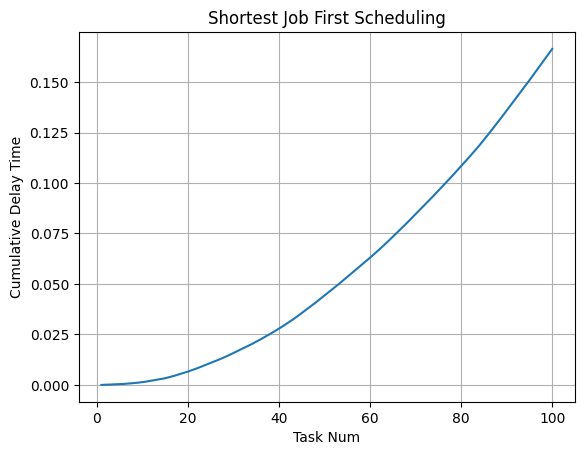

In [7]:
# Sort by 'final_delay' for SJF (Shortest Job First) scheduling
df_sjf = df.sort_values('final_delay', ignore_index=True)

# Get the sorted final delays
sorted_sjf = df_sjf['final_delay'].to_numpy()

# Preallocate an array for the cumulative sum (SJF)
sjf_cumulative = np.zeros(len(sorted_sjf))

# Calculate the cumulative sum
for i in range(1, len(sorted_sjf)):
    sjf_cumulative[i] = sjf_cumulative[i-1] + sorted_sjf[i]

# Plotting the cumulative delay for Shortest Job First (SJF) scheduling
plt.plot(df_sjf.index + 1, sjf_cumulative)  # Add 1 to index for more intuitive task numbers
plt.xlabel("Task Num")
plt.ylabel('Cumulative Delay Time')
plt.title('Shortest Job First Scheduling')
plt.grid(True)
plt.show()

### 2.LJF

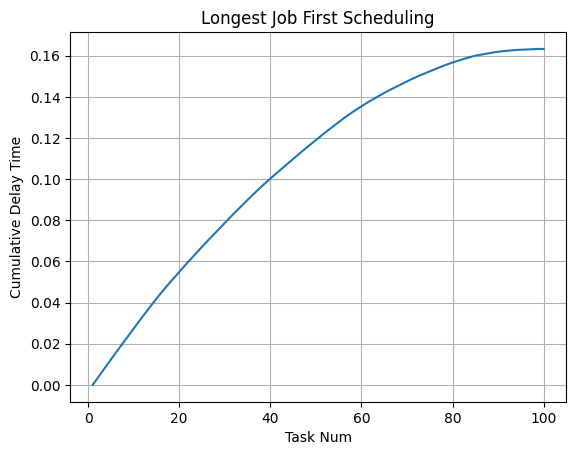

In [8]:
# Sort by 'final_delay' for LJF (Longest Job First) scheduling (in descending order)
df_ljf = df.sort_values('final_delay', ignore_index=True, ascending=False)

# Get the sorted final delays
sorted_ljf = df_ljf['final_delay'].to_numpy()

# Preallocate an array for the cumulative sum (LJF)
ljf_cumulative = np.zeros(len(sorted_ljf))

# Calculate the cumulative sum
for i in range(1, len(sorted_ljf)):
    ljf_cumulative[i] = ljf_cumulative[i-1] + sorted_ljf[i]

# Plotting the cumulative delay for Longest Job First (LJF) scheduling
plt.plot(df_ljf.index + 1, ljf_cumulative)  # Add 1 to index for more intuitive task numbers
plt.xlabel("Task Num")
plt.ylabel('Cumulative Delay Time')
plt.title('Longest Job First Scheduling')
plt.grid(True)
plt.show()

### 3.FCFS

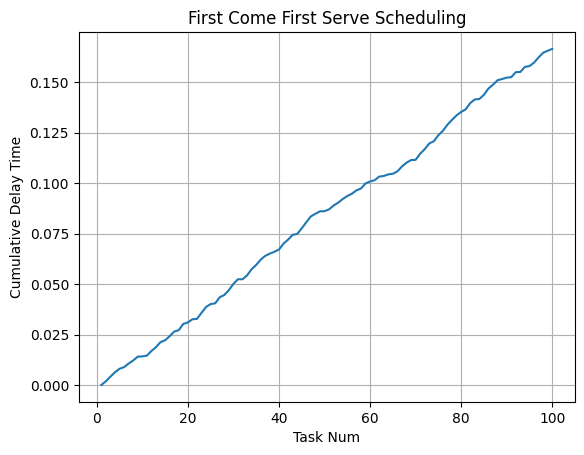

In [9]:
# FCFS scheduling function
def FCFS():
    # Preallocate array for cumulative delays
    fcfs_cumulative = np.zeros(len(df))

    # Calculate cumulative sum for FCFS (First Come First Serve)
    fcfs_cumulative[0] = df['final_delay'].iloc[0]
    for i in range(1, len(df)):
        fcfs_cumulative[i] = fcfs_cumulative[i-1] + df['final_delay'].iloc[i]

    return fcfs_cumulative

# Get the cumulative delays for FCFS
fcfs = FCFS()

# Plotting the cumulative delay for FCFS scheduling
plt.plot(df.index + 1, fcfs)  # Add 1 to index for more intuitive task numbers
plt.xlabel("Task Num")
plt.ylabel('Cumulative Delay Time')
plt.title('First Come First Serve Scheduling')
plt.grid(True)
plt.show()

### 4.LCFS

Tasks sorted in LCFS order (most recent tasks first):
    Index  input_size  output_size  priority  process_delay  \
99    100          30           75         5       0.000937   
98     99          32            6         3       0.001000   
97     98          75           15         2       0.002344   
96     97          84           34         1       0.002625   
95     96          54           31         2       0.001687   
..    ...         ...          ...       ...            ...   
4       5          53            2         1       0.001656   
3       4          69           70         5       0.002156   
2       3          74           83         1       0.002312   
1       2          58           41         1       0.001813   
0       1           2           36         1       0.000063   

    calculated_input_delay  calculated_output_delay  final_delay  
99            3.000000e-07             7.500000e-07       0.0009  
98            3.200000e-07             6.000000e-08    

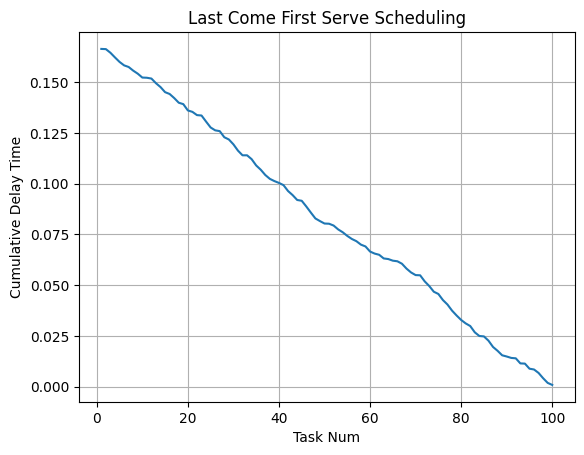

In [10]:
# Sort the DataFrame by index in descending order (LCFS)
df_lcfs = df.sort_index(ascending=False)

# Print the DataFrame to see tasks sorted by LCFS order
print("Tasks sorted in LCFS order (most recent tasks first):")
print(df_lcfs)

# LCFS scheduling function
def LCFS():
    # Preallocate array for cumulative delays
    lcfs_cumulative = np.zeros(len(df_lcfs))

    # Calculate cumulative sum for LCFS (Last Come First Serve)
    lcfs_cumulative[0] = df_lcfs['final_delay'].iloc[0]
    for i in range(1, len(df_lcfs)):
        lcfs_cumulative[i] = lcfs_cumulative[i-1] + df_lcfs['final_delay'].iloc[i]

    return lcfs_cumulative

# Get the cumulative delays for LCFS
lcfs = LCFS()

# Plotting the cumulative delay for LCFS scheduling
plt.plot(df_lcfs.index + 1, lcfs)  # Add 1 to index for more intuitive task numbers
plt.xlabel("Task Num")
plt.ylabel('Cumulative Delay Time')
plt.title('Last Come First Serve Scheduling')
plt.grid(True)
plt.show()

### 5.Priority

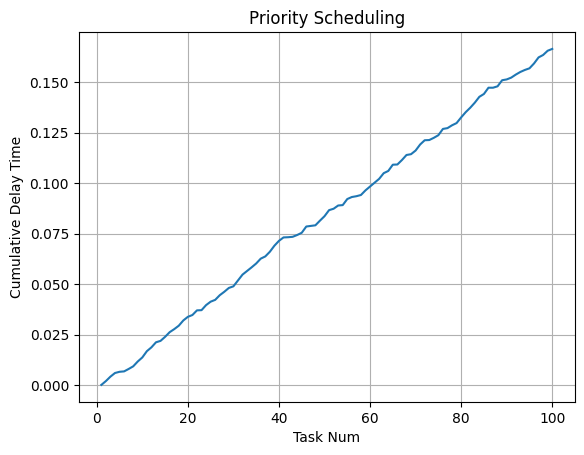

In [11]:
# Sort the DataFrame by 'priority' (ascending order)
df = df.sort_values('priority', ignore_index=True)

# Get the sorted final delays
sorted_priority = df['final_delay'].to_numpy()

# Preallocate array for cumulative delays (Priority Scheduling)
prio_cumulative = np.zeros(len(sorted_priority))

# Calculate cumulative sum for Priority Scheduling
prio_cumulative[0] = sorted_priority[0]
for i in range(1, len(sorted_priority)):
    prio_cumulative[i] = prio_cumulative[i-1] + sorted_priority[i]

# Plotting the cumulative delay for Priority Scheduling
plt.plot(df.index + 1, prio_cumulative)  # Add 1 to index for more intuitive task numbers
plt.xlabel("Task Num")
plt.ylabel('Cumulative Delay Time')
plt.title('Priority Scheduling')
plt.grid(True)
plt.show()

### Comparison of FCFS, SJF, Priority, and LJF

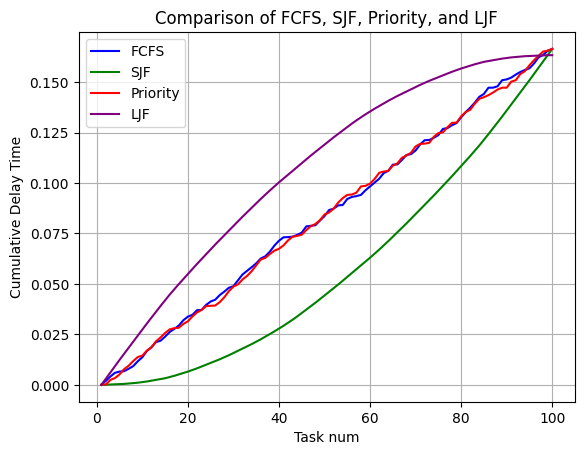

In [14]:
# We will plot these on the same graph to compare them

plt.plot(df.index + 1, fcfs, label='FCFS', color='blue')
plt.plot(df_sjf.index + 1, sjf_cumulative, label='SJF', color='green')
plt.plot(df.index + 1, prio_cumulative, label='Priority', color='red')
plt.plot(df_ljf.index + 1, ljf_cumulative, label='LJF', color='purple')

# Labeling the plot
plt.xlabel('Task num')
plt.ylabel('Cumulative Delay Time')
plt.title('Comparison of FCFS, SJF, Priority, and LJF')
plt.legend()  # This will display the legend for each line
plt.grid(True)  # Optional: to add a grid for better readability

# Show the plot
plt.show()


ML Apply

In [15]:
# Using df_sjf as the dataset
df1 = df_sjf

# Defining input features (calculated delays) and output feature (final_delay)
x = df1[['calculated_input_delay', 'calculated_output_delay']]
y = df1['final_delay']

# Importing train_test_split for splitting the data
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (90% train, 10% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=1)

### 1.Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model with training data
lr.fit(x_train, y_train)

# Make predictions on the test data
pred = lr.predict(x_test)

# Print the accuracy score (R-squared value)
print('Accuracy score (R²):', round(lr.score(x_test, y_test), 2))

# Model evaluation metrics
r2 = round(r2_score(y_test, pred), 2)  # R-squared (R²)
mae = mean_absolute_error(y_test, pred)  # Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, pred))  # Root Mean Squared Error
mse = mean_squared_error(y_test, pred)  # Mean Squared Error

# Calculate Adjusted R-squared
n = len(y_test)  # Number of test samples
p = x_train.shape[1]  # Number of features

# Adjusted R-squared formula
adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Defining a DataFrame to store the evaluation metrics for display
results = pd.DataFrame([['Linear Regression', r2, mae, mse, rmse, adjusted_r_squared]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Adjusted R-squared'])

# Display the evaluation results
results



Accuracy score (R²): 1.0


,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Adjusted R-squared
0,Linear Regression,1.0,0.000024,8.167266e-10,0.000029,1.0


### 2.Decision Tree

In [19]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Decision Tree Regressor
model_dt = DecisionTreeRegressor()
model_dt.fit(x_train, y_train)
pred = model_dt.predict(x_test)

# Model evaluation metrics
r2 = r2_score(y_test, pred)  # R-squared (R²)
mae = mean_absolute_error(y_test, pred)  # Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, pred))  # Root Mean Squared Error
mse = mean_squared_error(y_test, pred)  # Mean Squared Error

# Adjusted R-squared calculation
n = len(y_test)  # Number of test samples
p = x_train.shape[1]  # Number of features
adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Round all metrics after calculation
r2 = round(r2, 2)
mae = round(mae, 4)
rmse = round(rmse, 4)
mse = round(mse, 4)
adjusted_r_squared = round(adjusted_r_squared, 4)

# Print the evaluation metrics
print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Adjusted R-squared:", adjusted_r_squared)

# Defining a DataFrame to store the evaluation metrics for display
results = pd.DataFrame([['Decision Tree', r2, mae, mse, rmse, adjusted_r_squared]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Adjusted R-squared'])

# Display the evaluation results
results


R-squared (R²): 1.0
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Adjusted R-squared: 0.9977


,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Adjusted R-squared
0,Decision Tree,1.0,0.0,0.0,0.0,0.9977


### 3.Random Forest

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize and train the Random Forest Regressor
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)
pred = model_rf.predict(x_test)

# Test score (R² score)
test_score = model_rf.score(x_test, y_test) * 100
print('Testing score (R²):', test_score)

# Model evaluation metrics
r2 = r2_score(y_test, pred)  # R-squared (R²)
mae = mean_absolute_error(y_test, pred)  # Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, pred))  # Root Mean Squared Error
mse = mean_squared_error(y_test, pred)  # Mean Squared Error

# Adjusted R-squared calculation
n = len(y_test)  # Number of test samples
p = x_train.shape[1]  # Number of features
adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Round all metrics after calculation
r2 = round(r2, 2)
mae = round(mae, 4)
rmse = round(rmse, 4)
mse = round(mse, 4)
adjusted_r_squared = round(adjusted_r_squared, 4)

# Print the evaluation metrics
print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Adjusted R-squared:", adjusted_r_squared)

# Defining a DataFrame to store the evaluation metrics for display
results = pd.DataFrame([['Random Forest', r2, mae, mse, rmse, adjusted_r_squared]],
                      columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Adjusted R-squared'])

# Display the evaluation results
results


Testing score (R²): 99.90644927536232
R-squared (R²): 1.0
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Adjusted R-squared: 0.9988


,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Adjusted R-squared
0,Random Forest,1.0,0.0,0.0,0.0,0.9988


### 4.Boosting Algorithm(GradientBoostingRegressor, xgb)

In [22]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

# Gradient Boosting Regressor
model_gb = GradientBoostingRegressor(random_state=42)

# Train the model
model_gb.fit(x_train, y_train)

# Make predictions on the test set
pred = model_gb.predict(x_test)

# Model evaluation metrics
r2 = r2_score(y_test, pred)  # R-squared (R²)
mae = mean_absolute_error(y_test, pred)  # Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, pred))  # Root Mean Squared Error
mse = mean_squared_error(y_test, pred)  # Mean Squared Error

# Adjusted R-squared calculation
n = len(y_test)  # Number of test samples
p = x_train.shape[1]  # Number of features
adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Round all metrics after calculation
r2 = round(r2, 2)
mae = round(mae, 4)
rmse = round(rmse, 4)
mse = round(mse, 4)
adjusted_r_squared = round(adjusted_r_squared, 4)

# Print the evaluation metrics
print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Adjusted R-squared:", adjusted_r_squared)

# Defining a DataFrame to store the evaluation metrics for display
results_gb = pd.DataFrame([['Gradient Boost', r2, mae, mse, rmse, adjusted_r_squared]],
                          columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Adjusted R-squared'])

# Display the evaluation results for Gradient Boosting
print(results_gb)


R-squared (R²): 1.0
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Adjusted R-squared: 1.0
            Model  R-squared (R²)  Mean Absolute Error  Mean Squared Error  \
0  Gradient Boost             1.0                  0.0                 0.0   

   Root Mean Squared Error  Adjusted R-squared  
0                      0.0                 1.0  


In [23]:
# XGBoost Regressor
model_xgb = xgb.XGBRegressor(random_state=42)

# Train the model
model_xgb.fit(x_train, y_train)

# Make predictions on the test set
pred_xgb = model_xgb.predict(x_test)

# Model evaluation metrics for XGBoost
r2_xgb = r2_score(y_test, pred_xgb)  # R-squared (R²)
mae_xgb = mean_absolute_error(y_test, pred_xgb)  # Mean Absolute Error
rmse_xgb = np.sqrt(mean_squared_error(y_test, pred_xgb))  # Root Mean Squared Error
mse_xgb = mean_squared_error(y_test, pred_xgb)  # Mean Squared Error

# Adjusted R-squared calculation for XGBoost
adjusted_r_squared_xgb = 1 - ((1 - r2_xgb) * (n - 1) / (n - p - 1))

# Round all metrics for XGBoost
r2_xgb = round(r2_xgb, 2)
mae_xgb = round(mae_xgb, 4)
rmse_xgb = round(rmse_xgb, 4)
mse_xgb = round(mse_xgb, 4)
adjusted_r_squared_xgb = round(adjusted_r_squared_xgb, 4)

# Print the evaluation metrics for XGBoost
print("R-squared (R²) for XGBoost:", r2_xgb)
print("Mean Absolute Error (MAE) for XGBoost:", mae_xgb)
print("Mean Squared Error (MSE) for XGBoost:", mse_xgb)
print("Root Mean Squared Error (RMSE) for XGBoost:", rmse_xgb)
print("Adjusted R-squared for XGBoost:", adjusted_r_squared_xgb)

# Defining a DataFrame to store the evaluation metrics for XGBoost
results_xgb = pd.DataFrame([['Xg Boost', r2_xgb, mae_xgb, mse_xgb, rmse_xgb, adjusted_r_squared_xgb]],
                           columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Adjusted R-squared'])

# Display the evaluation results for XGBoost
print(results_xgb)

R-squared (R²) for XGBoost: 0.98
Mean Absolute Error (MAE) for XGBoost: 0.0001
Mean Squared Error (MSE) for XGBoost: 0.0
Root Mean Squared Error (RMSE) for XGBoost: 0.0001
Adjusted R-squared for XGBoost: 0.9723
      Model  R-squared (R²)  Mean Absolute Error  Mean Squared Error  \
0  Xg Boost            0.98               0.0001                 0.0   

   Root Mean Squared Error  Adjusted R-squared  
0                   0.0001              0.9723  


# 5.Stacking

### Decision Tree + Linear Regression

In [26]:
from sklearn.ensemble import StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create base models
base_models = [('model_dt', DecisionTreeRegressor(random_state=42)), ('lr', LinearRegression())]

# Create the Stacking Regressor with Linear Regression as the final estimator
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train the stacking model
stacking_model.fit(x_train, y_train)

# Make predictions on the test set
pred = stacking_model.predict(x_test)

# Model evaluation metrics
r2 = r2_score(y_test, pred)  # R-squared (R²)
mae = mean_absolute_error(y_test, pred)  # Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, pred))  # Root Mean Squared Error
mse = mean_squared_error(y_test, pred)  # Mean Squared Error

# Adjusted R-squared calculation
n = len(y_test)  # Number of test samples
p = x_train.shape[1]  # Number of features
adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Round all metrics
r2 = round(r2, 2)
mae = round(mae, 4)
rmse = round(rmse, 4)
mse = round(mse, 4)
adjusted_r_squared = round(adjusted_r_squared, 4)

# Print the evaluation metrics
print("R-squared (R²):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Adjusted R-squared:", adjusted_r_squared)

# Defining a DataFrame to store the evaluation metrics for stacking
results_stacking = pd.DataFrame([['Stacking', r2, mae, mse, rmse, adjusted_r_squared]],
                                columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Adjusted R-squared'])

# Display the DataFrame with formatted table
sns.set(style="whitegrid")  # optional for styling the table display

# Display the results properly
display(results_stacking)


R-squared (R²): 1.0
Mean Absolute Error (MAE): 0.0
Mean Squared Error (MSE): 0.0
Root Mean Squared Error (RMSE): 0.0
Adjusted R-squared: 0.9994


,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Adjusted R-squared
0,Stacking,1.0,0.0,0.0,0.0,0.9994


### Decision Tree + Gradient Boosting Regressor + Linear regression

In [28]:
# Create base models
base_models = [('model_dt', DecisionTreeRegressor(random_state=42)),
               ('gb', GradientBoostingRegressor(random_state=42)),
               ('lr', LinearRegression())]

# Create the Stacking Regressor with Linear Regression as the final estimator
stacking_model = StackingRegressor(estimators=base_models, final_estimator=LinearRegression())

# Train the stacking model
stacking_model.fit(x_train, y_train)

# Make predictions on the test set
pred = stacking_model.predict(x_test)

# Model evaluation metrics
r2 = r2_score(y_test, pred)  # R-squared (R²)
mae = mean_absolute_error(y_test, pred)  # Mean Absolute Error
rmse = np.sqrt(mean_squared_error(y_test, pred))  # Root Mean Squared Error
mse = mean_squared_error(y_test, pred)  # Mean Squared Error

# Adjusted R-squared calculation
n = len(y_test)  # Number of test samples
p = x_train.shape[1]  # Number of features
adjusted_r_squared = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Round all metrics
r2 = round(r2, 2)
mae = round(mae, 4)
rmse = round(rmse, 4)
mse = round(mse, 4)
adjusted_r_squared = round(adjusted_r_squared, 4)

# Defining a DataFrame to store the evaluation metrics for stacking
results_stacking = pd.DataFrame([['Stacking', r2, mae, mse, rmse, adjusted_r_squared]],
                                columns=['Model', 'R-squared (R²)', 'Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error', 'Adjusted R-squared'])

# Display the results
results_stacking


,Model,R-squared (R²),Mean Absolute Error,Mean Squared Error,Root Mean Squared Error,Adjusted R-squared
0,Stacking,1.0,0.0,0.0,0.0,0.9994


## Comparison of evaluation matrices

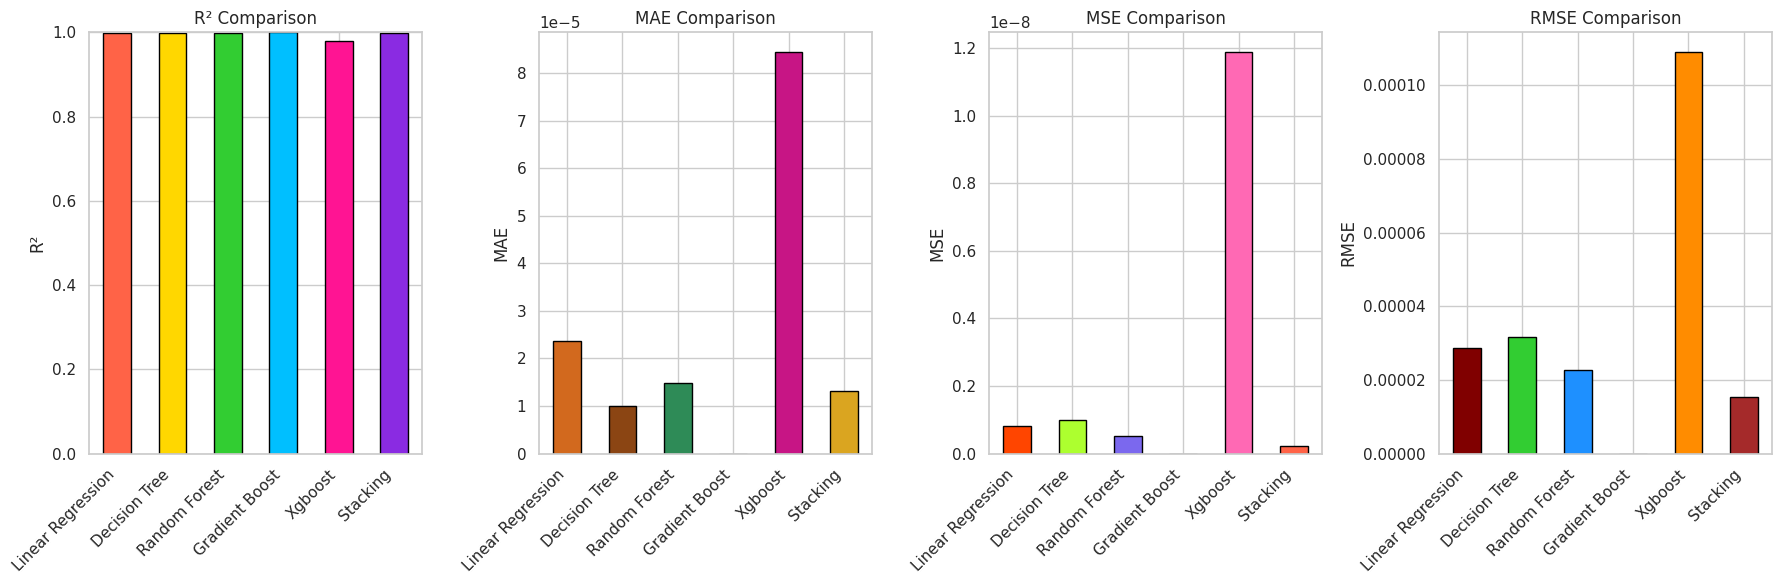

In [32]:
# Predictions for all models
y_pred_lr = lr.predict(x_test)
y_pred_dt = model_dt.predict(x_test)
y_pred_rf = model_rf.predict(x_test)
y_pred_gb = model_gb.predict(x_test)
y_pred_xgb = model_xgb.predict(x_test)
y_pred_stack = stacking_model.predict(x_test)

# Calculate performance metrics for each model
metrics = {
    'Linear Regression': {
        'R²': r2_score(y_test, y_pred_lr),
        'MAE': mean_absolute_error(y_test, y_pred_lr),
        'MSE': mean_squared_error(y_test, y_pred_lr),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_lr))
    },
    'Decision Tree': {
        'R²': r2_score(y_test, y_pred_dt),
        'MAE': mean_absolute_error(y_test, y_pred_dt),
        'MSE': mean_squared_error(y_test, y_pred_dt),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_dt))
    },
    'Random Forest': {
        'R²': r2_score(y_test, y_pred_rf),
        'MAE': mean_absolute_error(y_test, y_pred_rf),
        'MSE': mean_squared_error(y_test, y_pred_rf),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_rf))
    },
    'Gradient Boost': {
        'R²': r2_score(y_test, y_pred_gb),
        'MAE': mean_absolute_error(y_test, y_pred_gb),
        'MSE': mean_squared_error(y_test, y_pred_gb),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_gb))
    },
    'Xgboost': {
        'R²': r2_score(y_test, y_pred_xgb),
        'MAE': mean_absolute_error(y_test, y_pred_xgb),
        'MSE': mean_squared_error(y_test, y_pred_xgb),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_xgb))
    },
    'Stacking': {
        'R²': r2_score(y_test, y_pred_stack),
        'MAE': mean_absolute_error(y_test, y_pred_stack),
        'MSE': mean_squared_error(y_test, y_pred_stack),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_stack))
    }
}

# Convert metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting the performance metrics
fig, axes = plt.subplots(1, 4, figsize=(18, 6))

# Plot R²
metrics_df.loc['R²'].plot(kind='bar', ax=axes[0], color=['#FF6347', '#FFD700', '#32CD32', '#00BFFF', '#FF1493', '#8A2BE2'], edgecolor='black')
axes[0].set_title('R² Comparison')
axes[0].set_ylabel('R²')
axes[0].set_ylim(0, 1)

# Plot MAE
metrics_df.loc['MAE'].plot(kind='bar', ax=axes[1], color=['#D2691E', '#8B4513', '#2E8B57', '#4682B4', '#C71585', '#DAA520'], edgecolor='black')
axes[1].set_title('MAE Comparison')
axes[1].set_ylabel('MAE')

# Plot MSE
metrics_df.loc['MSE'].plot(kind='bar', ax=axes[2], color=['#FF4500', '#ADFF2F', '#7B68EE', '#20B2AA', '#FF69B4', '#FF6347'], edgecolor='black')
axes[2].set_title('MSE Comparison')
axes[2].set_ylabel('MSE')

# Plot RMSE
metrics_df.loc['RMSE'].plot(kind='bar', ax=axes[3], color=['#800000', '#32CD32', '#1E90FF', '#FF1493', '#FF8C00', '#A52A2A'], edgecolor='black')
axes[3].set_title('RMSE Comparison')
axes[3].set_ylabel('RMSE')

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

# Deep Learning

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Assuming df1 is your dataframe
df2 = df1.copy()  # Just an example of renaming df1 to df2

# Feature and target variables
input_features = df2[['calculated_input_delay', 'calculated_output_delay']]
target_variable = df2['final_delay']

# Normalize the input features
scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(input_features)

# Reshape the input for LSTM (samples, time steps, features)
reshaped_features = normalized_features.reshape((normalized_features.shape[0], 1, normalized_features.shape[1]))

# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(reshaped_features, target_variable, test_size=0.25, random_state=24)


### 1. SimpleRNN

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - loss: 0.0035 - val_loss: 0.0011
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0015 - val_loss: 4.4406e-04
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 7.6107e-04 - val_loss: 0.0015
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 8.9998e-04 - val_loss: 5.5767e-04
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 6.6699e-04 - val_loss: 1.4706e-04
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.2517e-04 - val_loss: 6.6972e-04
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 5.5622e-04 - val_loss: 1.3869e-04
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.6269e-04 - val_loss: 2.0477e-04
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 1.1820e-04 - val_loss: 1.9124e-04
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 1.3530e-04 - val_loss: 9.7489e-05
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 8.1785e-05 - val_loss: 2.0121e-05
Epoch 12/15
3/3 ━━━━━━━

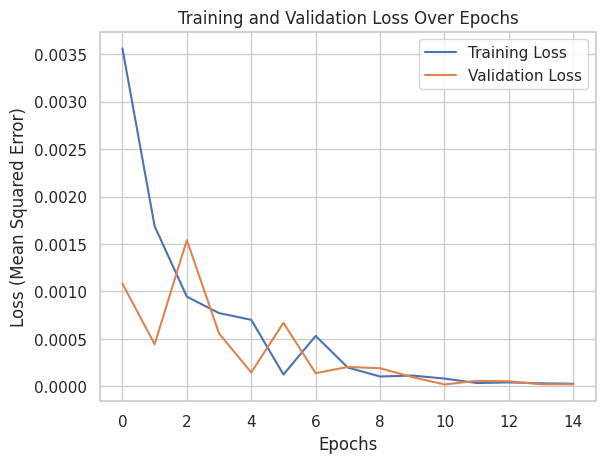

In [35]:
# Build the RNN model
from tensorflow.keras.layers import SimpleRNN, Dense

# Initialize the model
rnn_model = Sequential()
rnn_model.add(SimpleRNN(150, activation='tanh', input_shape=(1, reshaped_features.shape[2])))
rnn_model.add(Dense(20, activation='relu'))
rnn_model.add(Dense(1))

# Compile the model
rnn_model.compile(optimizer=Adam(learning_rate=0.002), loss='mse')

# Train the model
history_rnn = rnn_model.fit(features_train, target_train, epochs=15, batch_size=32, verbose=1, validation_data=(features_test, target_test))

# Make predictions on the test set
predictions_rnn = rnn_model.predict(features_test)

# Calculate performance metrics
mae_rnn = mean_absolute_error(target_test, predictions_rnn)
rmse_rnn = np.sqrt(mean_squared_error(target_test, predictions_rnn))

# Print performance metrics
print(f'Mean Absolute Error (MAE): {mae_rnn}')
print(f'Root Mean Squared Error (RMSE): {rmse_rnn}')

# Plot training and validation loss over epochs
plt.figure()
plt.plot(history_rnn.history['loss'], label='Training Loss')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.show()


### 2.LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 306ms/step - loss: 5.4828e-05 - val_loss: 2.2457e-05
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 3.0753e-05 - val_loss: 2.7565e-06
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 9.8647e-06 - val_loss: 4.7905e-05
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 3.7105e-05 - val_loss: 4.3571e-06
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 6.8558e-06 - val_loss: 1.2063e-05
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 8.6179e-06 - val_loss: 1.6819e-06
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 2.9677e-06 - val_loss: 1.1019e-05
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 9.1727e-06 - val_loss: 2.6933e-06
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 2.4158e-06 - val_loss: 6.1765e-06
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 5.0771e-06 - val_loss: 1.4178e-06
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 9.1713e-07 - val_loss: 1.6626e

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 203ms/step
Mean Absolute Error (MAE): 0.0006015498436428606
Root Mean Squared Error (RMSE): 0.0006532719979154139


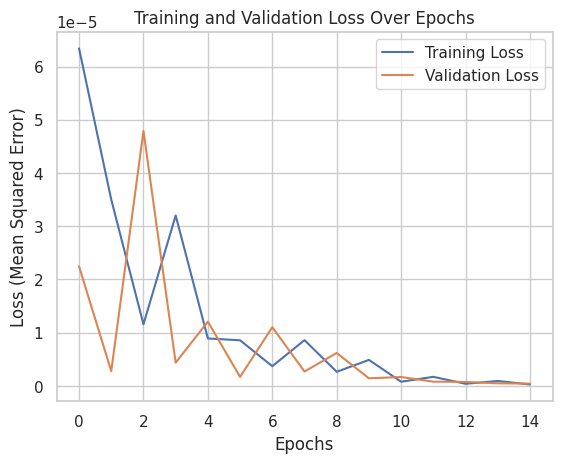

In [41]:
# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(120, activation='tanh', input_shape=(1, reshaped_features.shape[2])))  # Adjusted based on reshaped features
lstm_model.add(Dense(15, activation='relu'))
lstm_model.add(Dense(1))

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history_lstm = lstm_model.fit(features_train, target_train, epochs=15, batch_size=32, verbose=1, validation_data=(features_test, target_test))

# Make predictions on the test set
predictions_lstm = lstm_model.predict(features_test)

# Calculate performance metrics
mae_lstm = mean_absolute_error(target_test, predictions_lstm)
rmse_lstm = np.sqrt(mean_squared_error(target_test, predictions_lstm))

# Print performance metrics
print(f'Mean Absolute Error (MAE): {mae_lstm}')
print(f'Root Mean Squared Error (RMSE): {rmse_lstm}')

# Plot training and validation loss over epochs
plt.figure()
plt.plot(history_lstm.history['loss'], label='Training Loss')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.show()

### 3.BiLSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 284ms/step - loss: 9.7977e-05 - val_loss: 1.0516e-04
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.1302e-04 - val_loss: 5.6853e-06
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 1.0166e-05 - val_loss: 6.0012e-05
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 4.2428e-05 - val_loss: 2.5365e-06
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.5791e-06 - val_loss: 2.3474e-05
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 1.5474e-05 - val_loss: 6.0406e-06
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 9.0227e-06 - val_loss: 1.1387e-05
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 7.5481e-06 - val_loss: 4.5225e-06
Epoch 9/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 6.2227e-06 - val_loss: 3.2235e-06
Epoch 10/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 2.1729e-06 - val_loss: 4.5284e-06
Epoch 11/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 4.4978e-06 - val_loss: 3.6920e

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
Mean Absolute Error (MAE): 0.0007291531728506087
Root Mean Squared Error (RMSE): 0.0008217586887352728


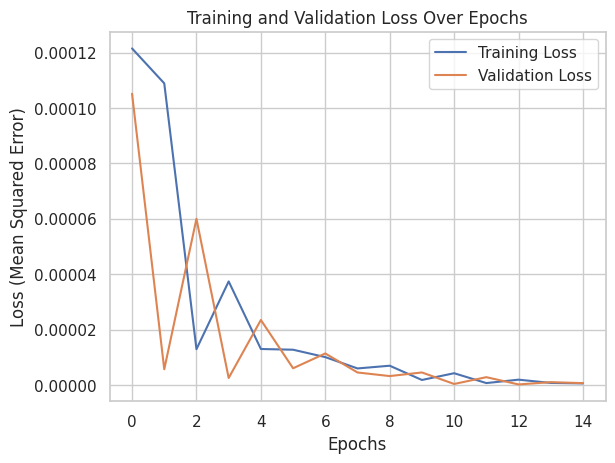

In [44]:
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

# Initialize the model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(120, activation='tanh'), input_shape=(1, reshaped_features.shape[2])))  # Adjusted based on reshaped features
bilstm_model.add(Dense(15, activation='relu'))
bilstm_model.add(Dense(1))

# Compile the model
bilstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history_bilstm = bilstm_model.fit(features_train, target_train, epochs=15, batch_size=32, verbose=1, validation_data=(features_test, target_test))

# Make predictions on the test set
predictions_bilstm = bilstm_model.predict(features_test)

# Calculate performance metrics
mae_bilstm = mean_absolute_error(target_test, predictions_bilstm)
rmse_bilstm = np.sqrt(mean_squared_error(target_test, predictions_bilstm))

# Print performance metrics
print(f'Mean Absolute Error (MAE): {mae_bilstm}')
print(f'Root Mean Squared Error (RMSE): {rmse_bilstm}')

# Plot training and validation loss over epochs
plt.figure()
plt.plot(history_bilstm.history['loss'], label='Training Loss')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.show()


### 4.GRU

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 - 5s - 2s/step - loss: 7.2339e-04 - val_loss: 2.6454e-04
Epoch 2/15
3/3 - 0s - 35ms/step - loss: 3.2079e-04 - val_loss: 1.8132e-04
Epoch 3/15
3/3 - 0s - 60ms/step - loss: 1.3789e-04 - val_loss: 1.0590e-05
Epoch 4/15
3/3 - 0s - 51ms/step - loss: 1.0959e-05 - val_loss: 5.5929e-05
Epoch 5/15
3/3 - 0s - 89ms/step - loss: 5.7895e-05 - val_loss: 6.8123e-05
Epoch 6/15
3/3 - 0s - 43ms/step - loss: 4.7487e-05 - val_loss: 1.2636e-05
Epoch 7/15
3/3 - 0s - 49ms/step - loss: 7.3638e-06 - val_loss: 1.2002e-05
Epoch 8/15
3/3 - 0s - 37ms/step - loss: 1.6429e-05 - val_loss: 2.7377e-05
Epoch 9/15
3/3 - 0s - 48ms/step - loss: 2.1364e-05 - val_loss: 8.8903e-06
Epoch 10/15
3/3 - 0s - 46ms/step - loss: 4.8159e-06 - val_loss: 3.0728e-06
Epoch 11/15
3/3 - 0s - 91ms/step - loss: 6.5270e-06 - val_loss: 9.6683e-06
Epoch 12/15
3/3 - 0s - 36ms/step - loss: 9.3593e-06 - val_loss: 2.6736e-06
Epoch 13/15
3/3 - 0s - 36ms/step - loss: 1.8593e-06 - val_loss: 1.3852e-06
Epoch 14/15
3/3 - 0s - 48ms/step - loss: 2.1201

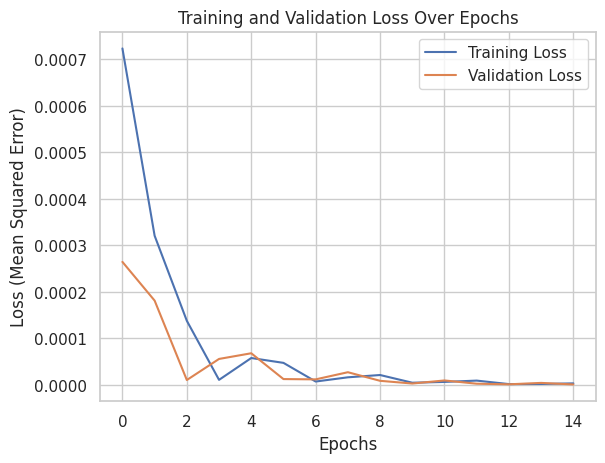

In [45]:
from tensorflow.keras.layers import GRU, Dense

# Initialize the GRU model
gru_model = Sequential()
gru_model.add(GRU(120, activation='tanh', input_shape=(1, reshaped_features.shape[2])))  # Adjusted based on reshaped features
gru_model.add(Dense(15, activation='relu'))
gru_model.add(Dense(1))

# Compile the model
gru_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the model
history_gru = gru_model.fit(features_train, target_train, epochs=15, batch_size=32, verbose=2, validation_data=(features_test, target_test))

# Make predictions on the test set
predictions_gru = gru_model.predict(features_test)

# Calculate performance metrics
mae_gru = mean_absolute_error(target_test, predictions_gru)
rmse_gru = np.sqrt(mean_squared_error(target_test, predictions_gru))

# Print performance metrics
print(f'Mean Absolute Error (MAE): {mae_gru}')
print(f'Root Mean Squared Error (RMSE): {rmse_gru}')

# Plot training and validation loss over epochs
plt.figure()
plt.plot(history_gru.history['loss'], label='Training Loss')
plt.plot(history_gru.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.show()


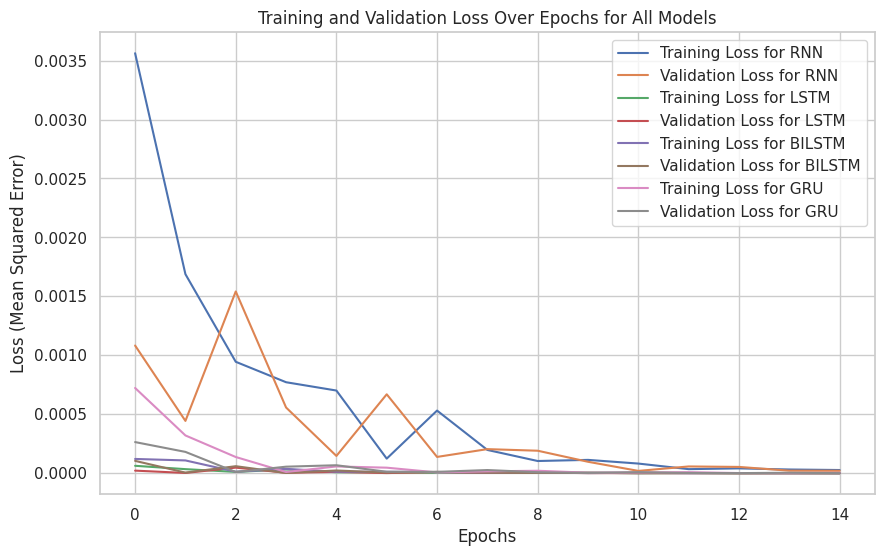

In [46]:
# Plot training and validation loss for all models
plt.figure(figsize=(10, 6))

# RNN
plt.plot(history_rnn.history['loss'], label='Training Loss for RNN')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss for RNN')

# LSTM
plt.plot(history_lstm.history['loss'], label='Training Loss for LSTM')
plt.plot(history_lstm.history['val_loss'], label='Validation Loss for LSTM')

# BILSTM
plt.plot(history_bilstm.history['loss'], label='Training Loss for BILSTM')
plt.plot(history_bilstm.history['val_loss'], label='Validation Loss for BILSTM')

# GRU
plt.plot(history_gru.history['loss'], label='Training Loss for GRU')
plt.plot(history_gru.history['val_loss'], label='Validation Loss for GRU')

# Title and labels
plt.title('Training and Validation Loss Over Epochs for All Models')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


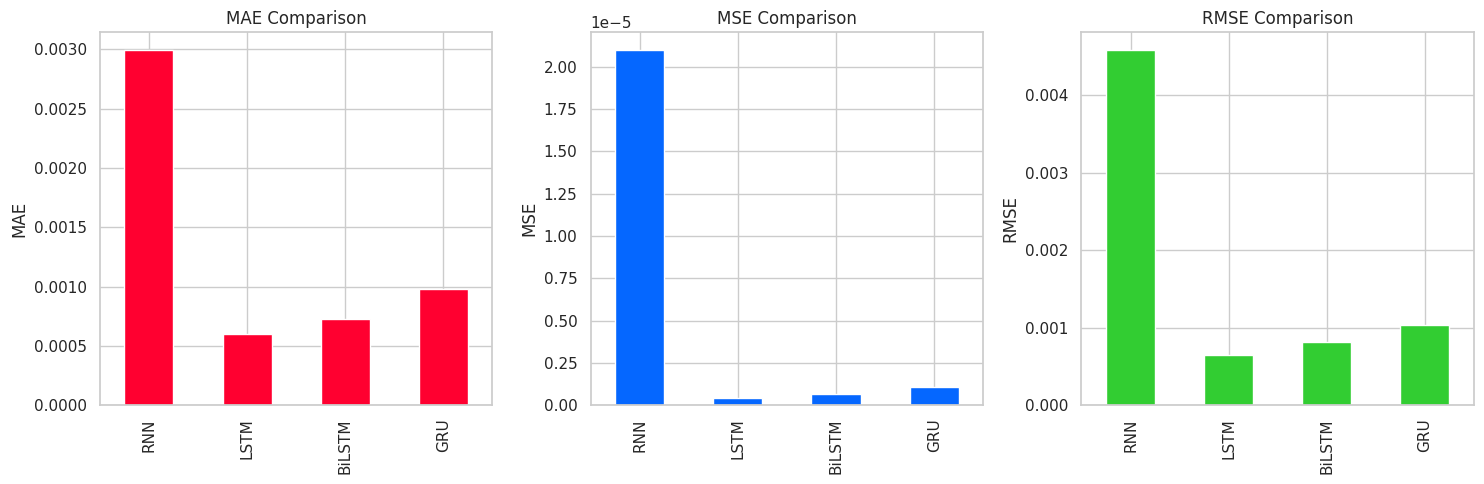

In [55]:
# Make predictions for each model
y_pred_rnn = rnn_model.predict(features_test)
y_pred_lstm = lstm_model.predict(features_test)
y_pred_bilstm = bilstm_model.predict(features_test)
y_pred_gru = gru_model.predict(features_test)

# Calculate performance metrics for each model
metrics = {
    'RNN': {
        'MAE': mean_absolute_error(target_test, y_pred_rnn),
        'MSE': mean_squared_error(target_test, y_pred_rnn),
        'RMSE': np.sqrt(mean_squared_error(target_test, y_pred_rnn))
    },
    'LSTM': {
        'MAE': mean_absolute_error(target_test, y_pred_lstm),
        'MSE': mean_squared_error(target_test, y_pred_lstm),
        'RMSE': np.sqrt(mean_squared_error(target_test, y_pred_lstm))
    },
    'BiLSTM': {
        'MAE': mean_absolute_error(target_test, y_pred_bilstm),
        'MSE': mean_squared_error(target_test, y_pred_bilstm),
        'RMSE': np.sqrt(mean_squared_error(target_test, y_pred_bilstm))
    },
    'GRU': {
        'MAE': mean_absolute_error(target_test, y_pred_gru),
        'MSE': mean_squared_error(target_test, y_pred_gru),
        'RMSE': np.sqrt(mean_squared_error(target_test, y_pred_gru))
    }
}

# Convert metrics dictionary to a DataFrame
metrics_df = pd.DataFrame(metrics)

# Plotting the performance metrics with different shades of colors
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot MAE
metrics_df.loc['MAE'].plot(kind='bar', ax=axes[0], color='#FF0030')  # Dark orange shade
axes[0].set_title('MAE Comparison')
axes[0].set_ylabel('MAE')

# Plot MSE
metrics_df.loc['MSE'].plot(kind='bar', ax=axes[1], color='#0567FF')  # Deep sky blue shade
axes[1].set_title('MSE Comparison')
axes[1].set_ylabel('MSE')

# Plot RMSE
metrics_df.loc['RMSE'].plot(kind='bar', ax=axes[2], color='#32CD32')  # Lime green shade
axes[2].set_title('RMSE Comparison')
axes[2].set_ylabel('RMSE')

# Show the plot
plt.tight_layout()
plt.show()

